In [6]:
import Pkg; Pkg.add("GLMakie")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Permutations ─────────── v0.4.20
   Installed FFTW ─────────────────── v1.8.0
   Installed OffsetArrays ─────────── v1.13.0
   Installed PNGFiles ─────────────── v0.4.3
   Installed Multisets ────────────── v0.4.4
   Installed ImageIO ──────────────── v0.6.7
   Installed JpegTurbo ────────────── v0.1.5
   Installed AxisArrays ───────────── v0.4.7
   Installed TiffImages ───────────── v0.6.8
   Installed EarCut_jll ───────────── v2.2.4+0
   Installed SetRounding ──────────── v0.2.1
   Installed StableHashTraits ─────── v1.1.6
   Installed OpenEXR ──────────────── v0.3.2
   Installed ProgressMeter ────────── v1.9.0
   Installed Sixel ────────────────── v0.1.3
   Installed GLMakie ──────────────── v0.9.6
   Installed IntelOpenMP_jll ──────── v2024.0.2+0
   Installed Polynomials ──────────── v4.0.6
   Installed SignedDistanceFields ─── v0.4.0
   Installed FastRounding ─────────── v0.3.

    Building ModernGL → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/b76ea40b5c0f45790ae09492712dd326208c28b2/build.log`
Precompiling project...
  ✓ Permutations
  ✓ PolygonOps
  ✓ RangeArrays
  ✓ ErrorfreeArithmetic
  ✓ IndirectArrays
  ✓ AbstractLattices
  ✓ PositiveFactorizations
  ✓ TriplotBase
  ✓ RoundingEmulator
  ✓ OffsetArrays
  ✓ WoodburyMatrices
  ✓ PkgVersion
  ✓ ProgressMeter
  ✓ Extents
  ✓ IterTools
  ✓ LazyModules
  ✓ Ratios
  ✓ Inflate
  ✓ TupleTools
  ✓ MakieCore
  ✓ Multisets
  ✓ RingLists
  ✓ SetRounding
  ✓ ModernGL
  ✓ Mods
  ✓ MappedArrays
  ✓ SignedDistanceFields
  ✓ IntelOpenMP_jll
  ✓ Imath_jll
  ✓ CRlibm_jll
  ✓ EarCut_jll
  ✓ PikaParser
  ✓ libsixel_jll
  ✓ SimpleTraits
  ✓ isoband_jll
  ✓ FFTW_jll
  ✓ ColorBrewer
  ✓ Animations
  ✓ LightXML
  ✓ FilePaths
  ✓ FiniteDiff
  ✓ FastRounding
  ✓ FreeType
  ✓ OffsetArrays → OffsetArraysAdaptExt
  ✓ SimplePartitions
  ✓ PaddedViews
  ✓ StackViews
  ✓ SimpleRandom
  ✓ AxisAlgorithms
  ✓ Ratios → Rati

In [7]:
using Symbolics
using GamesVoI
using Plots
using DataFrames
# include("experiments/tower_defense_exponential.jl")
include("experiments/tower_defense.jl")

compute_stage_2

In [8]:
prior = [1/3, 1/3,1/3]
omega_params = [[.02,0.8,0.8],[0.8,0.4,0.8],[0.8,0.8,0.7]]
r_init =[0.5,0.25,0.25]

out = solve_r(prior,omega_params,r_init=r_init, return_states=true)

0: r = [0.5, 0.25, 0.25]
r = [0.351, 0.102, 0.547]
r = [0.263, 0.037, 0.7]
r = [0.437, 0.0, 0.563]
r = [0.398, 0.0, 0.602]
r = [0.498, 0.0, 0.502]
r = [0.71, 0.0, 0.29]
r = [0.697, 0.0, 0.303]
r = [0.787, 0.0, 0.213]
r = [0.62, 0.017, 0.363]
r = [0.665, 0.0, 0.335]
r = [0.762, 0.0, 0.238]
r = [0.841, 0.0, 0.159]
r = [0.905, 0.0, 0.095]
r = [0.958, 0.0, 0.042]
r = [1.0, 0.0, 0.0]
r = [0.994, 0.006, 0.0]
r = [0.766, 0.206, 0.028]
r = [0.616, 0.346, 0.038]
r = [0.789, 0.211, 0.0]
r = [0.863, 0.137, 0.0]
r = [0.924, 0.076, 0.0]
r = [0.974, 0.026, 0.0]
r = [1.0, 0.0, 0.0]
r = [1.0, 0.0, 0.0]
r = [0.994, 0.006, 0.0]
r = [0.766, 0.206, 0.028]
r = [0.616, 0.346, 0.038]
r = [0.789, 0.211, 0.0]
r = [0.62, 0.363, 0.018]
r = [1.0, 0.0, 0.0]
r = [0.773, 0.028, 0.199]
r = [0.614, 0.039, 0.347]
r = [0.407, 0.431, 0.162]
r = [0.417, 0.443, 0.141]
r = [0.427, 0.456, 0.117]
r = [0.44, 0.47, 0.09]
r = [0.454, 0.486, 0.061]
r = [0.47, 0.502, 0.028]
r = [0.353, 0.647, 0.0]
r = [0.035, 0.462, 0.503]
r = [0.

Dict{String, AbstractArray{Float64}} with 4 entries:
  "x_matrix" => [0.2 0.631602 … 0.2 0.2; 0.2 0.184199 … 0.374132 0.538751; … ; …
  "x"        => [0.2, 0.538751, 0.261249, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5  … …
  "r"        => [0.229807, 0.737829, 0.0323643]
  "r_matrix" => [0.350986 0.263204 … 0.0253053 0.229807; 0.101914 0.0369067 … 0…

## Plot Decision Variables over GD

This code will take my `out` object from the previous code block, and use it to generate a plot showing the evolution of $r$ and $x$ over time.

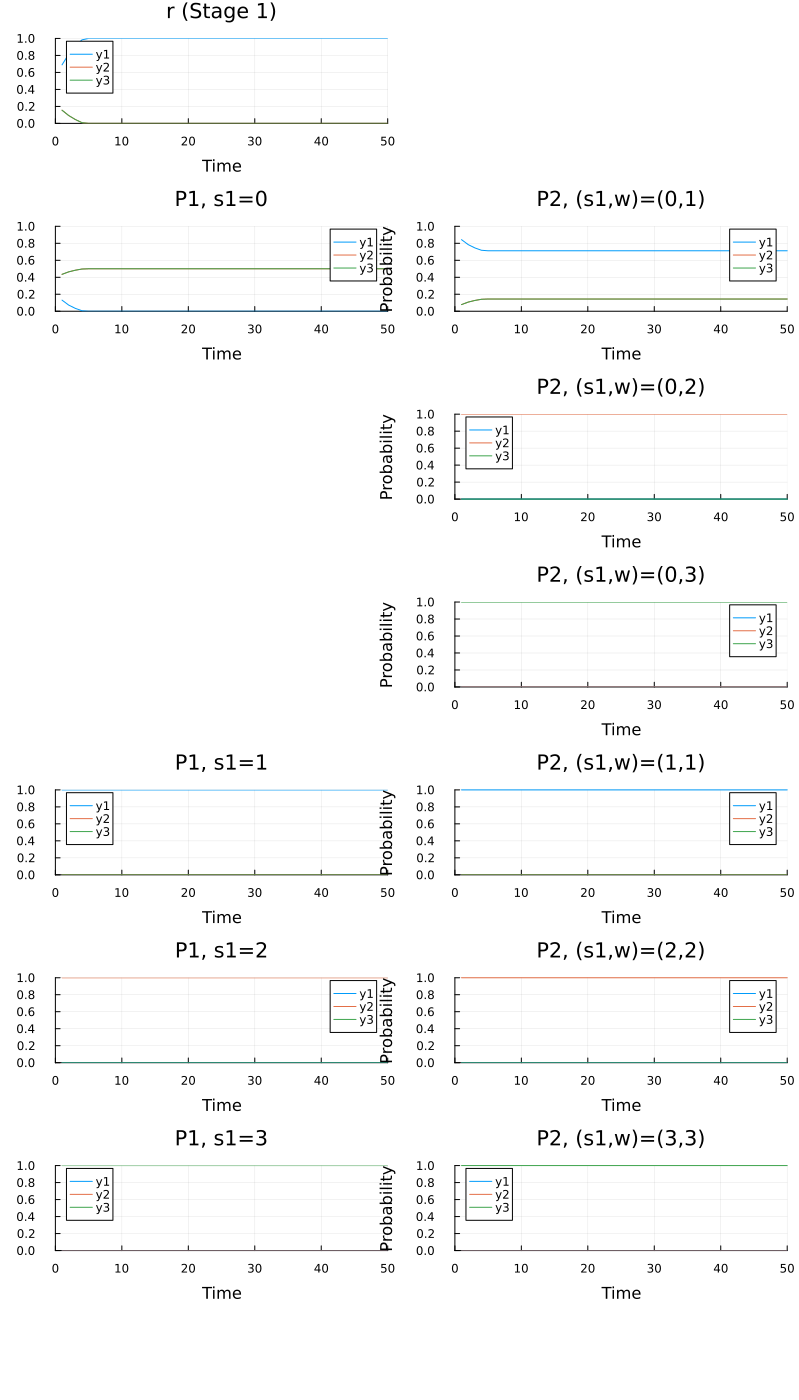

In [3]:
x_matrix = out["x_matrix"]
r_matrix = out["r_matrix"]
titles = ["r (Stage 1)","P1, s1=0","P1, s1=1","P1, s1=2","P1, s1=3",
    "P2, (s1,w)=(0,1)","P2, (s1,w)=(0,2)","P2, (s1,w)=(0,3)",
    "P2, (s1,w)=(1,1)","P2, (s1,w)=(2,2)","P2, (s1,w)=(3,3)"]
index_map = [1,2,6,7,8,3,9,4,10,5,11] ## reorder states/titles in graph
# Assuming `x_matrix` is your n x m matrix
n, m = size(x_matrix)
num_vectors = 10  # Number of 3-vectors
vector_length = 3  # Length of each vector
@assert n == num_vectors*vector_length "Provided dimensions do not match";

data = []
 
push!(data, hcat(1:m,transpose(r_matrix)))

for i in 1:num_vectors ## add Stage 2 decision variables
    # Extract each 3-vector and reshape it
    start_row = (i - 1) * vector_length + 1
    end_row = start_row + vector_length - 1
    vector_matrix = x_matrix[start_row:end_row, :]

    # Convert to DataFrame
    new_matrix = hcat(1:m,transpose(vector_matrix))
    
    push!(data, new_matrix)
end


### PLOTTING

using Plots
using DataFrames

# Assuming `data` is your reshaped data suitable for plotting
# Each element in `data` is a DataFrame with columns representing the components of a 3-vector and rows representing timesteps

plots = []



for i in 1:11  # Assuming 10 such 3-vectors
    j = index_map[i]
    mat = data[j]  # Your DataFrame for each 3-vector
    if i>1
        p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Probability", title=titles[j],ylimits=(0,1),xlimits=(0,50))
    else
        p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Scouts", title=titles[j],ylimits=(0,1),xlimits=(0,50))
    end
    push!(plots, p)
    if i==1
       push!(plots,plot(legend=false,grid=false,foreground_color_subplot=:white)) 
    end
    if i>2 && i<5
       push!(plots,plot(legend=false,grid=false,foreground_color_subplot=:white)) 
    end
end

# Combine all subplots into one figure
plot(plots..., layout=(8, 2), legend=true)  # Adjust layout as needed
plot!(size = (800, 1400))

## Plot Decisions/Costs over GD (under construction)

This section is still under construction. I wanted a visualization that included the costs, over time, as well. This would be useful for debugging.

In [ ]:
game,fs = build_stage_2(prior,omega_params)

In [92]:
# game,fs = build_stage_2(prior,omega_params)
r_mat = out["r_matrix"]
x_mat = out["x_matrix"]

cost_matrix = 1:10
cost_matrix = cost_matrix'
print(size(cost_matrix))

m = size(r_mat)[2]

for tt in 1:3
    current_costs = [ff(BlockArray(x_mat[:,tt], repeat([3], outer = 10)),r_mat[:,tt]) for ff in fs]
    cost_matrix = vcat(cost_matrix, current_costs')
    print(current_costs)
end
cost_matrix = cost_matrix[2:end,:]

(1, 10)[2.3930842546822988e-32, 3.000000000000001, 3.0, 3.0, 0.6666666666730381, 0.6666666700460344, 0.6666666666392559, 2.2281153200039965, 2.697318212713702, 2.9428082063440497][6.958731016193841e-32, 3.000000000000001, 3.0, 3.0, 0.6666666927151942, 0.6666666734970208, 0.6666670438042436, 2.2281153181224544, 2.697318211960431, 2.9428081736570926][2.2177776286658088e-31, 3.000000000000001, 3.0, 3.0, 0.6666666672499614, 0.666666667057768, 0.6666666666712378, 2.2281153199624795, 2.697318213276322, 2.942808206342194]

3×10 Matrix{Float64}:
 2.39308e-32  3.0  3.0  3.0  0.666667  …  0.666667  2.22812  2.69732  2.94281
 6.95873e-32  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281
 2.21778e-31  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281

3×10 Matrix{Float64}:
 2.39308e-32  3.0  3.0  3.0  0.666667  …  0.666667  2.22812  2.69732  2.94281
 6.95873e-32  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281
 2.21778e-31  3.0  3.0  3.0  0.666667     0.666667  2.22812  2.69732  2.94281

In [ ]:
matrix = out["x_matrix"]
titles = ["P1, s1=0","P1, s1=1","P1, s1=2","P1, s1=3",
    "P2, (s1,w)=(0,1)","P2, (s1,w)=(0,2)","P2, (s1,w)=(0,3)",
    "P2, (s1,w)=(1,1)","P2, (s1,w)=(2,2)","P2, (s1,w)=(3,3)"]

# Assuming `matrix` is your n x m matrix
n, m = size(matrix)
num_vectors = 10  # Number of 3-vectors
vector_length = 3  # Length of each vector
@assert n == num_vectors*vector_length "Provided dimensions do not match";

data_states = []
for i in 1:num_vectors
    # Extract each 3-vector and reshape it
    start_row = (i - 1) * vector_length + 1
    end_row = start_row + vector_length - 1
    vector_matrix = matrix[start_row:end_row, :]

    # Convert to DataFrame
    new_matrix = hcat(1:m,transpose(vector_matrix))
    
    push!(data_states, new_matrix)
end


### PLOTTING

using Plots
using DataFrames

# Assuming `data` is your reshaped data suitable for plotting
# Each element in `data` is a DataFrame with columns representing the components of a 3-vector and rows representing timesteps

plots = []
for i in 1:10  # Assuming 10 such 3-vectors
    mat = data[i]  # Your DataFrame for each 3-vector
    p = plot(mat[:,1],mat[:,2:4], xlabel="Time", ylabel="Probability", title=titles[i],ylimits=(0,1),xlimits=(0,50))
    push!(plots, p)
end

# Combine all subplots into one figure
plot(plots..., layout=(5, 2), legend=true)  # Adjust layout as needed
plot!(size = (800, 1000))

LoadError: KeyError: key "xmatrix" not found

In [38]:
fs

10-element Vector{Function}:
 #419 (generic function with 1 method)
 #422 (generic function with 1 method)
 #422 (generic function with 1 method)
 #422 (generic function with 1 method)
 #424 (generic function with 1 method)
 #424 (generic function with 1 method)
 #424 (generic function with 1 method)
 #426 (generic function with 1 method)
 #426 (generic function with 1 method)
 #426 (generic function with 1 method)

In [73]:
r_mat = out["r_matrix"]
x_mat = out["x_matrix"]

m = size(r_mat)[2]

for tt in 1:3
    current_costs = [ff(BlockArray(x_mat[:,tt], repeat([3], outer = 10)),r_mat[:,tt]) for ff in fs]
    print(current_costs)
end

[2.3930842546822988e-32, 3.000000000000001, 3.0, 3.0, 0.6666666666730381, 0.6666666700460344, 0.6666666666392559, 2.2281153200039965, 2.697318212713702, 2.9428082063440497][6.958731016193841e-32, 3.000000000000001, 3.0, 3.0, 0.6666666927151942, 0.6666666734970208, 0.6666670438042436, 2.2281153181224544, 2.697318211960431, 2.9428081736570926][2.2177776286658088e-31, 3.000000000000001, 3.0, 3.0, 0.6666666672499614, 0.666666667057768, 0.6666666666712378, 2.2281153199624795, 2.697318213276322, 2.942808206342194]

In [71]:
current_costs

LoadError: UndefVarError: `current_costs` not defined